In [121]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (10,8)

# Euler-Cromer

A simple cahnge to the Euler method si to update the velocity first and then use the new velocity to update the position

\begin{align}
v^{n+1} = v^{n} + \tau a(r^{n}) \\
r^{n+1} = r^{n} + \tau v^{n+1}\\
\end{align}

So in a sense we are treating the position update implicitly

We will use this method and the Euler method to integrate an orbit of a planet around the Sun and com[pare the results of the two methods

In [122]:
G = 4*np.pi**2
M_sun = 1.0

In [123]:
# to make things simpler we will split the ODE into two - one for position and one for velocity

def rhs_r(t, Y):
  x, y, vx, vy = Y

  xdot = vx
  ydot = vy

  return np.array([xdot, ydot])

def rhs_vt(t, Y):
  x, y, vx, vy = Y

  r = np.sqrt(x*x + y*y)
              
  vxdot = -G * M_sun * x / r**3
  vydot = -G * M_sun * y / r**3

  return np.array([vxdot, vydot])

In [124]:
class OrbitHistory:
  """store the time history of the orbit solution"""

  def __init__(self):
    self.t = []
    self.x = []
    self.y = []
    self.vx = []
    self.vy = []

  def store_current_solution(self, t, Y):
    self.t.append(t)
    self.x.append(Y[0])
    self.y.append(Y[1])
    self.vx.append(Y[2])
    self.vy.append(Y[3])

  def plot(self, ax=None, label=None):

    fig = None

    if ax is None:
      fig = plt.figure()
      ax = fig.add_subplot(111)

      # draw the Sun
      ax.scatter([0], [0], marker=(20,1), color="y", s=250)

    # draw the orbit
    ax.plot(self.x, self.y, label=label)

    if fig is None:
      ax.set_aspect("equal")
      ax.set_xlabel("x [AU]")
      ax.set_ylabel("y [AU]")

      return fig, ax

In [125]:
# initial conditions

def initial_conditions():
  x0 = 0
  y0 = 1
  vx0 = -np.sqrt(G*M_sun/y0)
  vy0 = 0

  return np.array([x0, y0, vx0, vy0])

In [126]:
# Regular Explicit Euler scheme

def euler_orbit(Y0, tau, T):

  # rturn an orbit history object
  o = OrbitHistory()

  # store the new solution
  Y = Y0.copy()

  # initialize time
  t = 0

  # store the initial conditions
  o.store_current_solution(t, Y0)

  # main timestep loop
  while t < T:

    # make sure the loop does not extend past T
    if t + tau > T:
      tau = T - t
    
    # get the RHS of the ODE
    Rdot = rhs_r(t, Y)
    Vdot = rhs_vt(t, Y)

    Y[0] += tau * Rdot[0]
    Y[1] += tau * Rdot[1]

    Y[2] += tau * Vdot[0]
    Y[3] += tau * Vdot[1]

    t += tau

    # store the state
    o.store_current_solution(t, Y)

  return o

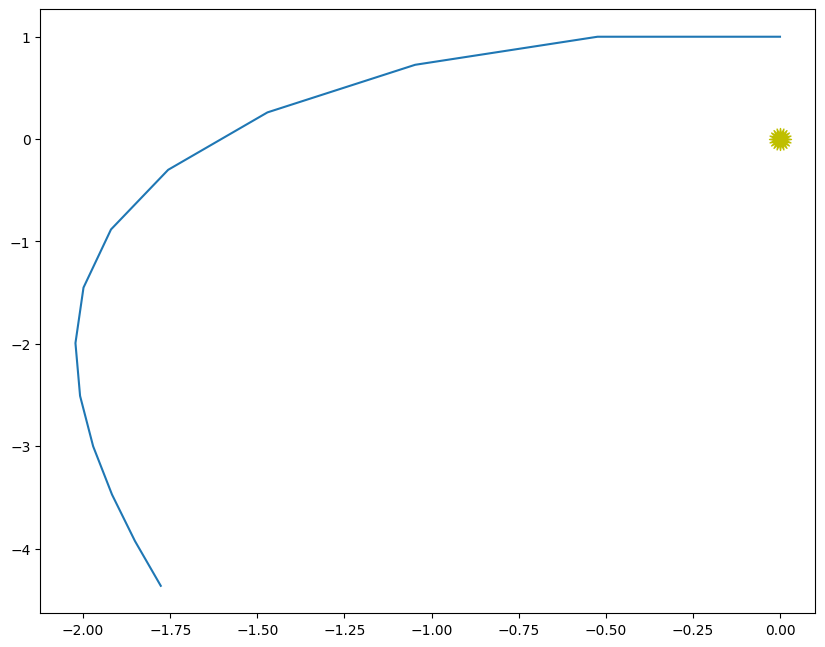

In [127]:
# run the scheme

Y0 = initial_conditions()

T = 1.0

tau = T/12.0

orbit = euler_orbit(Y0, tau, T)

orbit.plot()

In [128]:
# setup the variables into arrays for further use

x = np.array(orbit.x)
y = np.array(orbit.y)
vx = np.array(orbit.vx)
vy = np.array(orbit.vy)
t = np.array(orbit.t)

In [129]:
# setup the Energy equation
E = 0.5 * (vx**2 + vy**2) - G * M_sun / np.sqrt(x**2 + y**2)

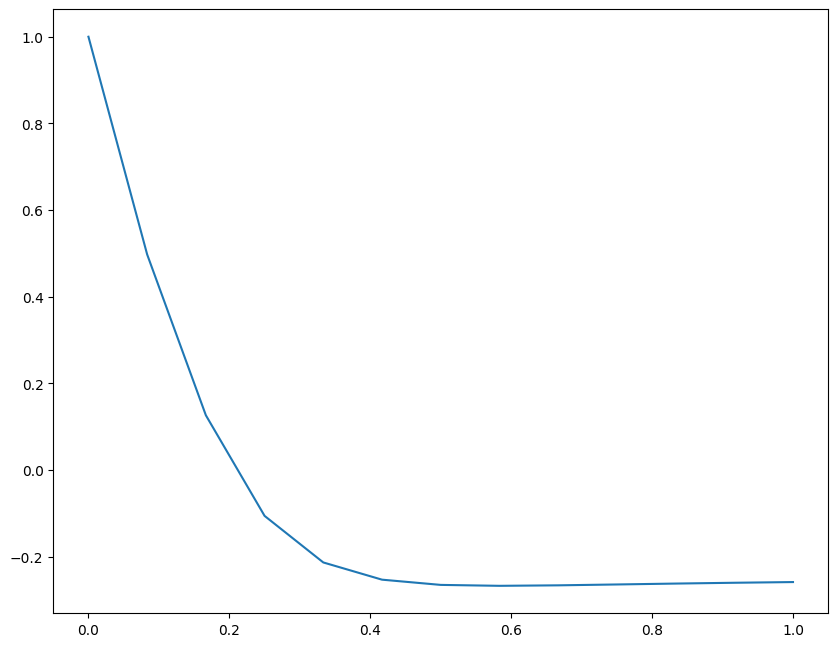

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t, E/E[0])

In [131]:
# now to define the Euler-Cromer scheme

def euler_cromer_orbit(Y0, tau, T):

  # setup is basically the same as the other scheme

  # return a orbit history object
  o = OrbitHistory()

  # store new solution
  Y = Y0.copy()

  # initialize time
  t = 0

  # store the initial conditions
  o.store_current_solution(t, Y0)

  # main timestep loop
  while t < T:

    # make sure the time step does not go past T
    if t + tau > T:
      tau = T - t

    # get the RHS of the ODE and adjust the Euler scheme to the Euler-Cromer scheme
    Vdot = rhs_vt(t, Y)

    Y[2] += tau * Vdot[0]
    Y[3] += tau * Vdot[1]

    Rdot = rhs_r(t, Y)

    Y[0] += tau * Rdot[0]
    Y[1] += tau * Rdot[1]

    t += tau

    # sotre the state
    o.store_current_solution(t, Y)

  return o

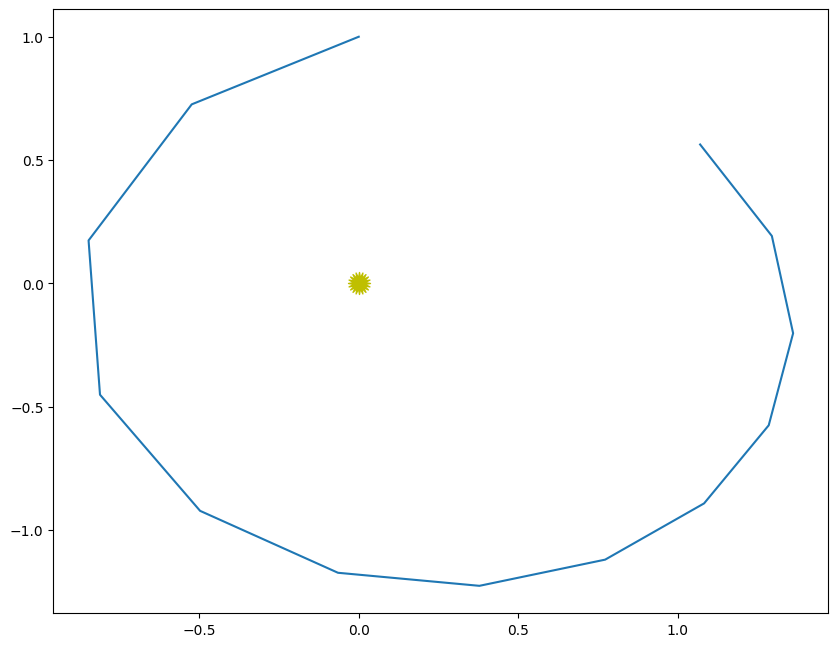

In [132]:
T = 1.0

tau = T/12.0

orbit = euler_cromer_orbit(Y0, tau, T)

orbit.plot()

The Euler-Cromer is better in this context than the Euler scheme because Euler-Cromer conserves a discrete form of the angular momentum while Euler does not.

Euler-Cromer is an example of a symplectic integrator.


Let's take a look at the Energy Conservation of the Euler-Cromer method.

Define the total energy per mass of our orbit as

$$ \epsilon = \frac{1}{2} |v|^2 - \frac{GM_{*}}{r} $$

Since the mass of our planet does not change, this is a conserved quantity. We will plot $\epsilon$ vs time for the different methods and compare their conservation.

In [133]:
# setup the variables into arrays for further use

x = np.array(orbit.x)
y = np.array(orbit.y)
vx = np.array(orbit.vx)
vy = np.array(orbit.vy)
t = np.array(orbit.t)

In [134]:
# setup the Energy equation
E = 0.5 * (vx**2 + vy**2) - G * M_sun / np.sqrt(x**2 + y**2)

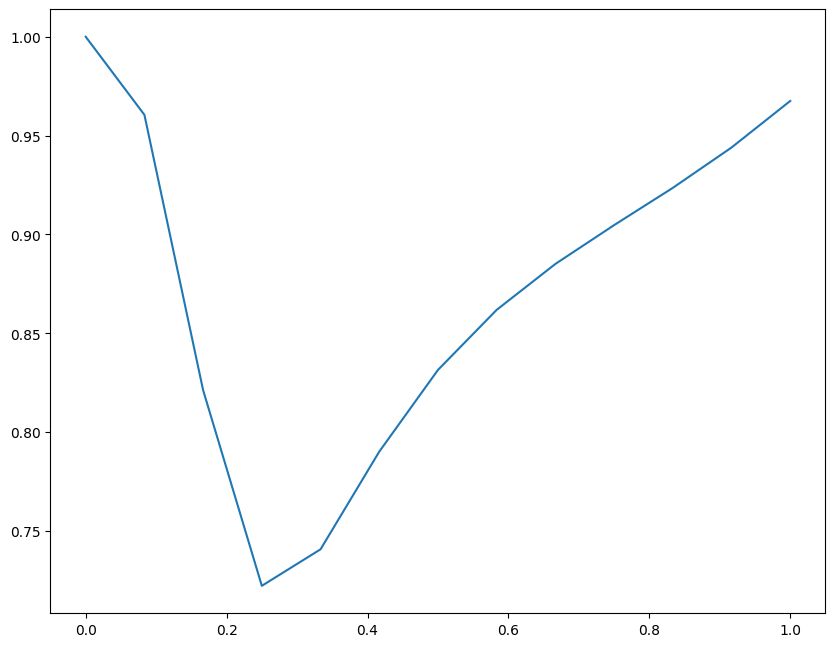

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t, E/E[0])

# Double Pendulum

Equations for double pendulum consisting of two equal length rigid rods.

$$
\dot{\theta_1} = \frac{6}{I} \frac{ 2 p_{\theta_1} - 3 \cos (\theta_{1} - \theta_{2}) p_{\theta_2}} {16 - 9 \cos^2 (\theta_{1} - \theta_{2})}
$$

$$
\dot{\theta_{2}} = \frac{6}{I} \frac{ 8 p_{\theta_2} - 3 \cos (\theta_{1} - \theta_{2}) p_{\theta_2}} {16 - 9 \cos^2 (\theta_{1} - \theta_{2})}
$$

$$
\dot{p_{\theta_1}} = \frac{-1}{2} I \left( \dot{\theta_1} \dot{\theta_2} \sin (\theta_1 - \theta_2) + 3 \frac{g}{l} \sin(\theta_1) \right)
$$

$$
\dot{p_{\theta_2}} = \frac{-1}{2} I \left(- \dot{\theta_1} \dot{\theta_2} \sin (\theta_1 - \theta_2) + \frac{g}{l} \sin(\theta_2) \right)
$$

where $I = m l^2$ is the moment of inertia, $\theta_1$ and $\theta_2$ are the angles of the two rods w.r.t. the vertical and $p_{\theta_1}$ and $p_{\theta_2}$ are the generalized momenta.

We will use RK4 given an initial $\theta_1$ and $\theta_2$ with the initial momenta to be zero.

We will also plot two different inital condition solutions to compare the behavious of each solution.

For ease we will set $g=L$. Also we do not want the pendulum to flip of the so we will restrict the angles to lie in $\pi$ to $-\pi$.

In [153]:
class DoublePendulum(object):
  """a class to manage and integrate the double pendulum"""


  def __init__(self, theta1, theta2, g=9.81, L=9.81, m=1.0):
    # initial conditions
    self.theta1_0 = np.radians(theta1)
    self.theta2_0 = np.radians(theta2)

    self.g = g

    # pendulum are equal in length and mass
    self.L = L
    self.m = m

    # final solution
    self.t = None
    self.theta1 = None
    self.theta2 = None


  def rhs(self, y):
    """equation of motion for a double pendulum"""

    theta1 = y[0]
    theta2 = y[1]
    p1 = y[2]
    p2 = y[3]

    # these equations are found through the Lagrangian approach to this system. We assume a compund pendulum and the moment of inertia is that for a rod
    I = self.m * self.L**2

    denom = 16 - 9 * np.cos(theta1 - theta2)**2
    t1dot = 6/I * (2 * p1 - 3 * np.cos(theta1 - theta2) * p2) / denom
    t2dot = 6/I * (8 * p2 - 3 * np.cos(theta1 - theta2) * p1) / denom

    p1dot = -0.5 * I * (t1dot * t2dot * np.sin(theta1 - theta2) + 3 * self.g * np.sin(theta1) / self.L)
    p2dot = -0.5 * I * (-t1dot * t2dot * np.sin(theta1 - theta2) + self.g * np.sin(theta2) / self.L)

    return np.asarray([t1dot, t2dot, p1dot, p2dot])


  def integrate(self, dt, tmax):
    """integrate the equations of motion using RK4"""

    # initial conditions
    t = 0.0
    theta1 = self.theta1_0
    theta2 = self.theta2_0

    # start at rest
    p1 = 0.0
    p2 = 0.0

    # store the history for plotting
    t_points = [t]
    theta1_points = [theta1]
    theta2_points = [theta2]

    y = np.asarray([theta1, theta2, p1, p2])

    while t < tmax:

      # get the RHS at time-level n
      k1 = self.rhs(y)
      k2 = self.rhs(y + 0.5 * dt * k1)
      k3 = self.rhs(y + 0.5 * dt * k2)
      k4 = self.rhs(y + dt * k3)

      ynew = y + dt/6.0 * (k1 + 2 * k2 + 2 * k3 + k4)

      t += dt

      # restrict theta
      ynew[0] = self.restrict_theta(ynew[0])
      ynew[1] = self.restrict_theta(ynew[1])

      # store
      t_points.append(t)
      theta1_points.append(ynew[0])
      theta2_points.append(ynew[1])

      # set the next step
      y[:] = ynew[:]

    # store the entire solution
    self.t = np.asarray(t_points)
    self.theta1 = np.asarray(theta1_points)
    self.theta2 = np.asarray(theta2_points)


  def restrict_theta(self, theta):
    """convert theta in place to be restricted to be within pi to -pi. This is done in a periodic fashion, with theta' = theta +/- 2n pi """

    # shift everything by pi, then restrict to lie in [0, 2pi], then shift back by pi

    theta += np.pi
    theta += -2.0 * np.pi * np.floor(theta/(2.0 * np.pi))
    theta -= np.pi

    return theta

In [154]:
dt = 0.05
tmax = 100.0

In [155]:
# run two double pendula with very close initial conditions, they should diverge at some point

p_a = DoublePendulum(80, 10)
p_a.integrate(dt, tmax)

p_b = DoublePendulum(80.00001, 10.00001)
p_b.integrate(dt, tmax)

Text(0, 0.5, '$\\theta_2$')

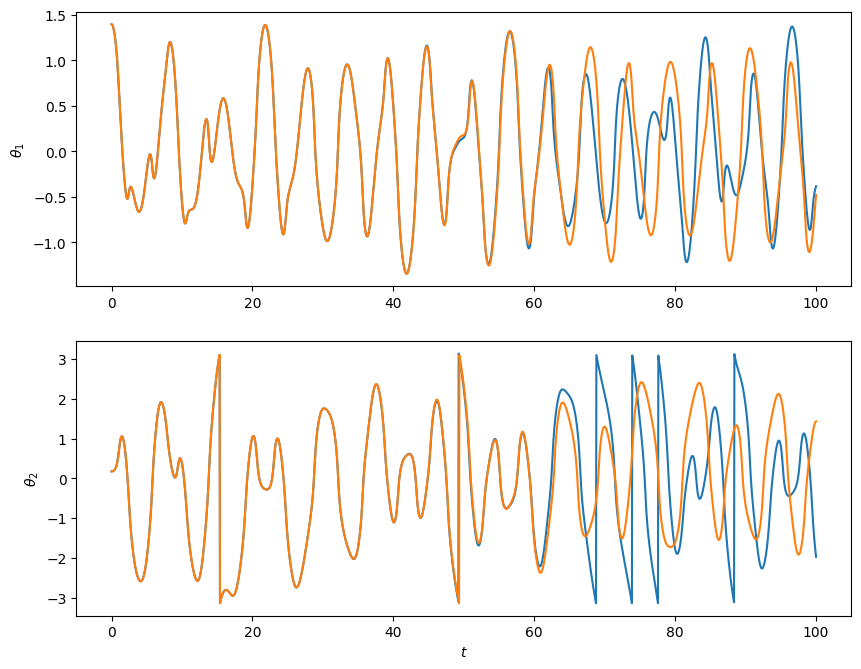

In [157]:
# plot the solutions over top of each other for easy comparison

fig = plt.figure()

ax = fig.add_subplot(211)

ax.plot(p_a.t, p_a.theta1)
ax.plot(p_b.t, p_b.theta1)
ax.set_ylabel(r"$\theta_1$")

ax = fig.add_subplot(212)

ax.plot(p_a.t, p_a.theta2)
ax.plot(p_b.t, p_b.theta2)

ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\theta_2$")